<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score

### Data Loading

In [4]:
# Read the hour.csv file
# YOUR CODE HERE
import pandas as pd

# Read the hour.csv file
hourly_data = pd.read_csv('hour.csv')




,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the first five rows of dataset

In [6]:
# YOUR CODE HERE
# Display the first few rows of the dataset
hourly_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [7]:
# YOUR CODE HERE
# Print the data types of the columns
hourly_data.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

<ipython-input-8-0e0888216cf5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hourly_data, x='hr', palette='viridis')


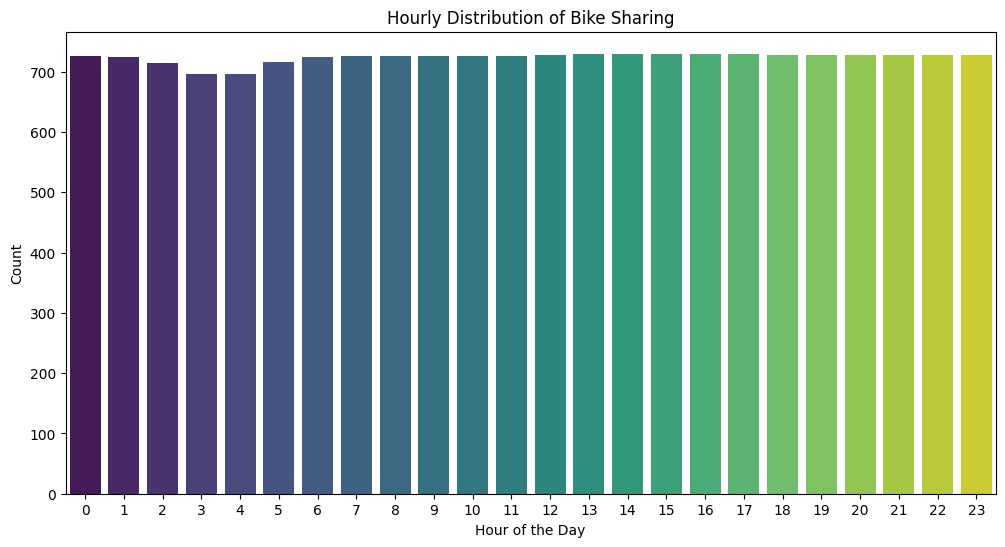

In [8]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing
plt.figure(figsize=(12, 6))
sns.countplot(data=hourly_data, x='hr', palette='viridis')
plt.title('Hourly Distribution of Bike Sharing')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()


#### Visualize the distribution of count, casual and registered variables

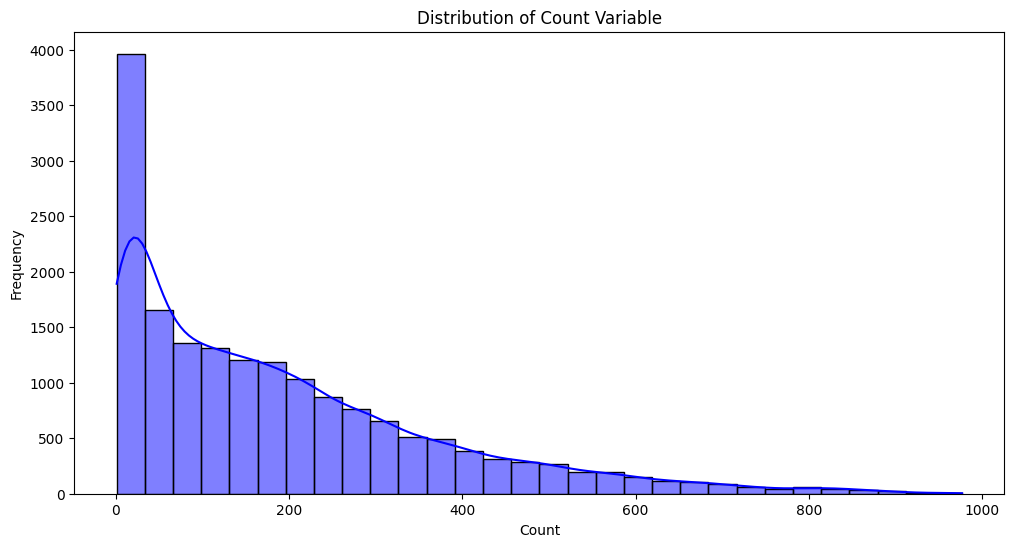

In [9]:
# YOUR CODE HERE for distribuiton of count variable
# Distribution of count variable
plt.figure(figsize=(12, 6))
sns.histplot(hourly_data['cnt'], bins=30, kde=True, color='blue')
plt.title('Distribution of Count Variable')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()


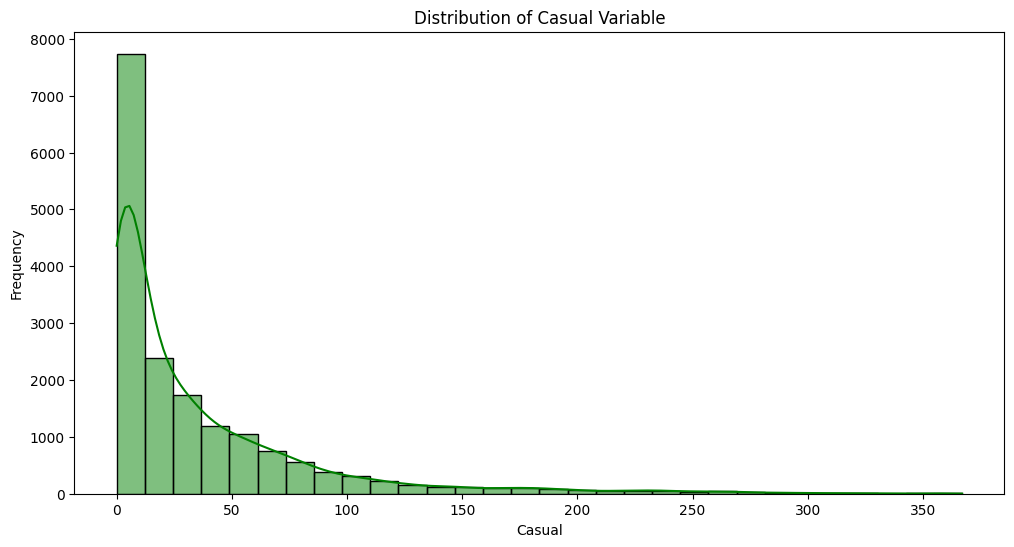

In [11]:
# YOUR CODE HERE for distribuiton of casual variable
# Distribution of casual variable
plt.figure(figsize=(12, 6))
sns.histplot(hourly_data['casual'], bins=30, kde=True, color='green')
plt.title('Distribution of Casual Variable')
plt.xlabel('Casual')
plt.ylabel('Frequency')
plt.show()


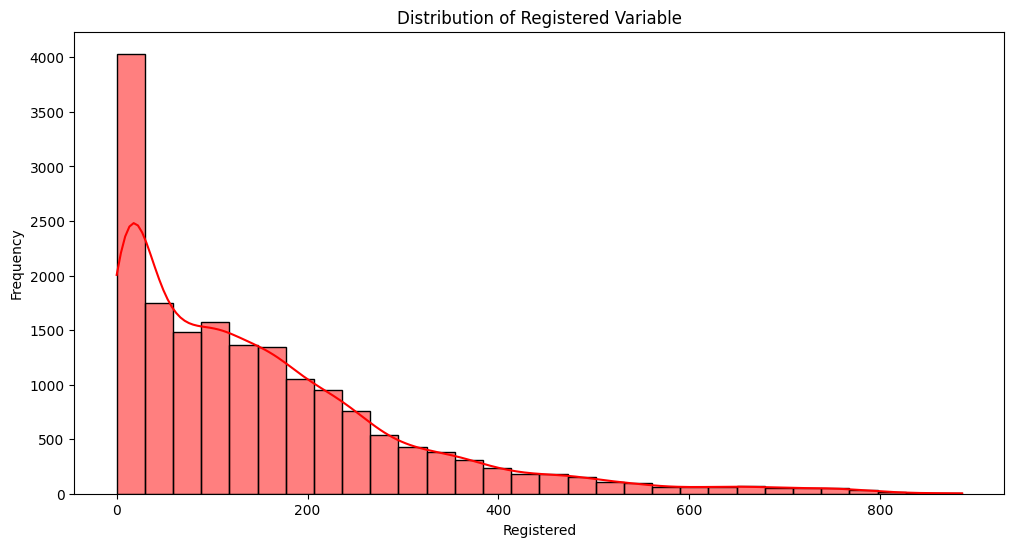

In [12]:
# YOUR CODE HERE for distribuiton of registered variable
# Distribution of registered variable
plt.figure(figsize=(12, 6))
sns.histplot(hourly_data['registered'], bins=30, kde=True, color='red')
plt.title('Distribution of Registered Variable')
plt.xlabel('Registered')
plt.ylabel('Frequency')
plt.show()


#### Describe the relation of weekday, holiday and working day

<ipython-input-15-ac5d1b7604f8>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hourly_data, x='weekday', y='cnt', ci=None, palette='viridis')
<ipython-input-15-ac5d1b7604f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_data, x='weekday', y='cnt', ci=None, palette='viridis')


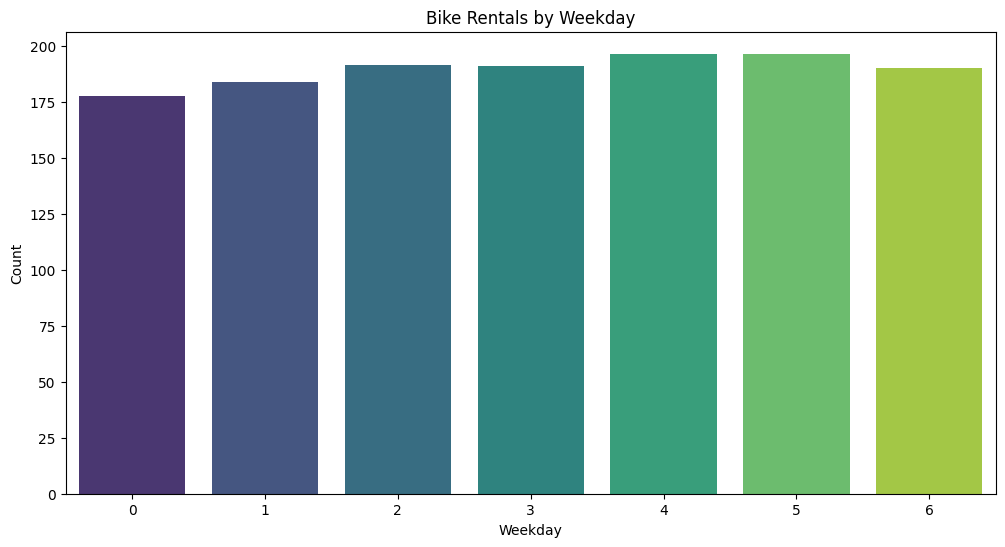

<ipython-input-15-ac5d1b7604f8>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hourly_data, x='holiday', y='cnt', ci=None, palette='viridis')
<ipython-input-15-ac5d1b7604f8>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_data, x='holiday', y='cnt', ci=None, palette='viridis')


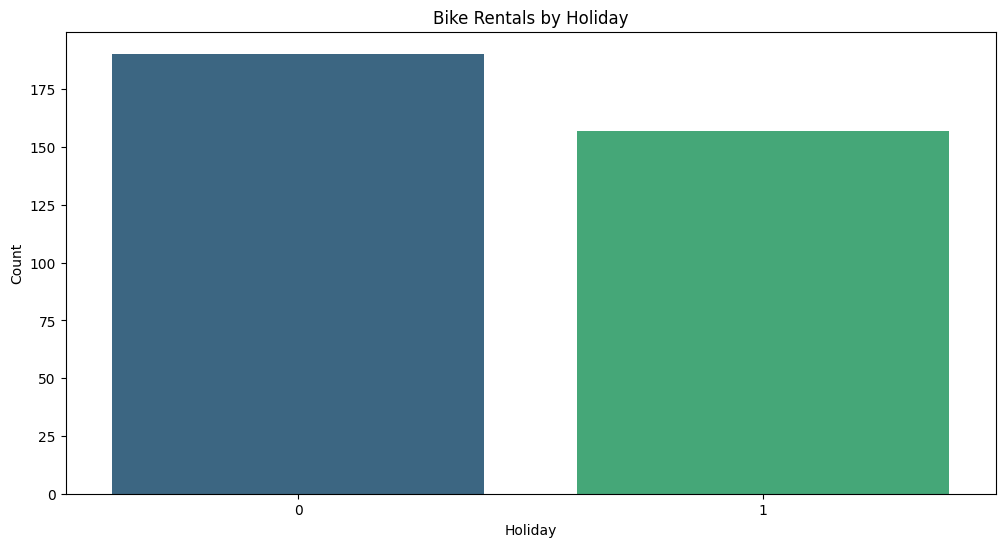

<ipython-input-15-ac5d1b7604f8>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hourly_data, x='workingday', y='cnt', ci=None, palette='viridis')
<ipython-input-15-ac5d1b7604f8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hourly_data, x='workingday', y='cnt', ci=None, palette='viridis')


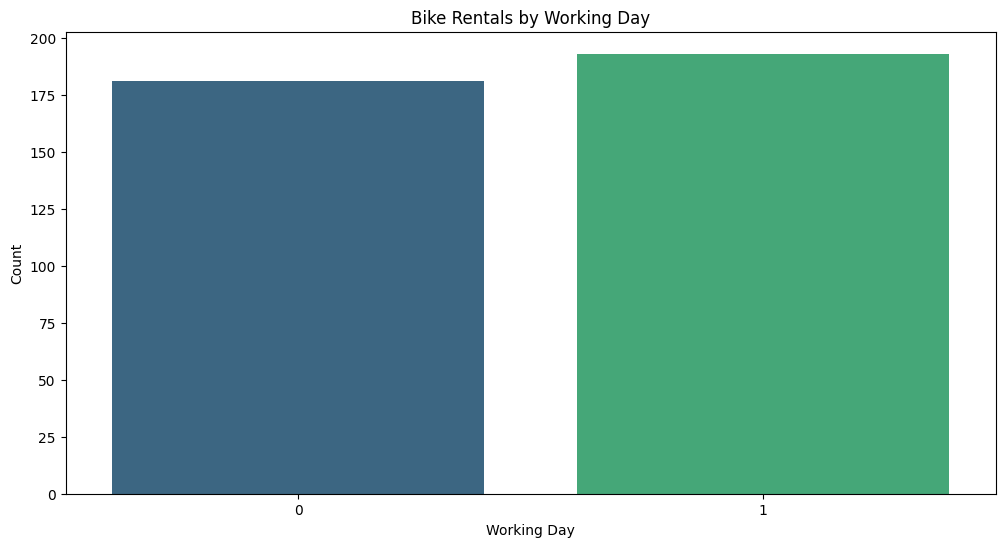

In [15]:
# YOUR CODE HERE


# Relation between weekday and count
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_data, x='weekday', y='cnt', ci=None, palette='viridis')
plt.title('Bike Rentals by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()


# Relation between holiday and count
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_data, x='holiday', y='cnt', ci=None, palette='viridis')
plt.title('Bike Rentals by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

# Relation between working day and count
plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_data, x='workingday', y='cnt', ci=None, palette='viridis')
plt.title('Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()


#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

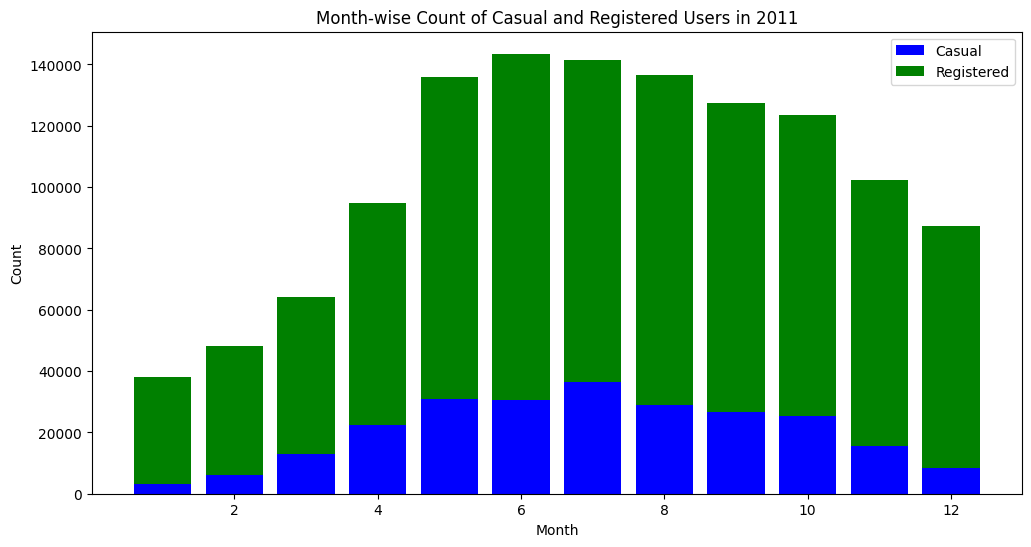

In [16]:
# stacked bar chart for year 2011
# YOUR CODE HERE
# Filter data for the year 2011
data_2011 = hourly_data[hourly_data['yr'] == 0]

# Group by month and calculate the sum of casual and registered counts
monthly_data_2011 = data_2011.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Plot stacked bar chart for year 2011
plt.figure(figsize=(12, 6))
plt.bar(monthly_data_2011['mnth'], monthly_data_2011['casual'], label='Casual', color='blue')
plt.bar(monthly_data_2011['mnth'], monthly_data_2011['registered'], bottom=monthly_data_2011['casual'], label='Registered', color='green')
plt.title('Month-wise Count of Casual and Registered Users in 2011')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


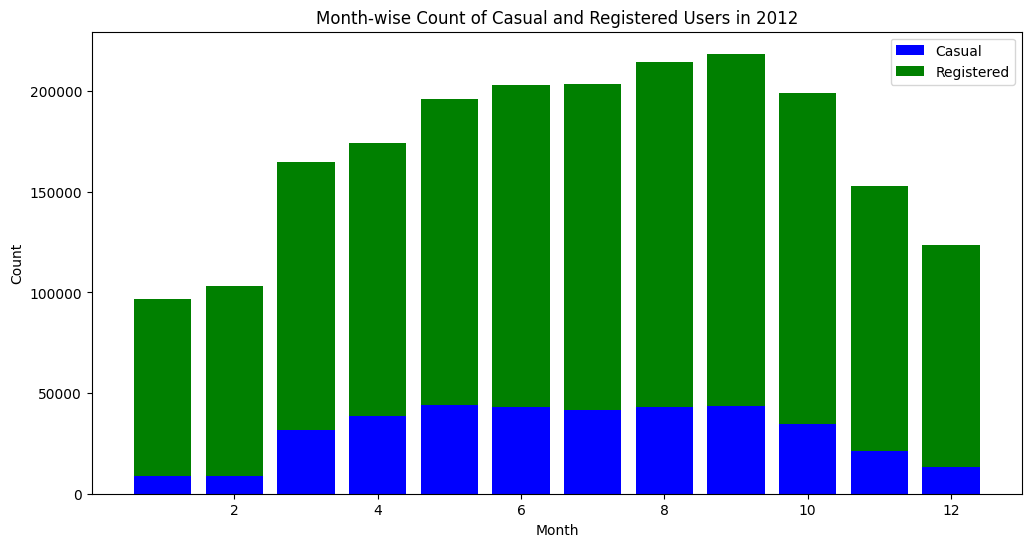

In [17]:
# stacked bar chart for year 2012
# YOUR CODE HERE
# Filter data for the year 2012
data_2012 = hourly_data[hourly_data['yr'] == 1]

# Group by month and calculate the sum of casual and registered counts
monthly_data_2012 = data_2012.groupby('mnth').agg({'casual': 'sum', 'registered': 'sum'}).reset_index()

# Plot stacked bar chart for year 2012
plt.figure(figsize=(12, 6))
plt.bar(monthly_data_2012['mnth'], monthly_data_2012['casual'], label='Casual', color='blue')
plt.bar(monthly_data_2012['mnth'], monthly_data_2012['registered'], bottom=monthly_data_2012['casual'], label='Registered', color='green')
plt.title('Month-wise Count of Casual and Registered Users in 2012')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()


#### Analyze the correlation between features with heatmap

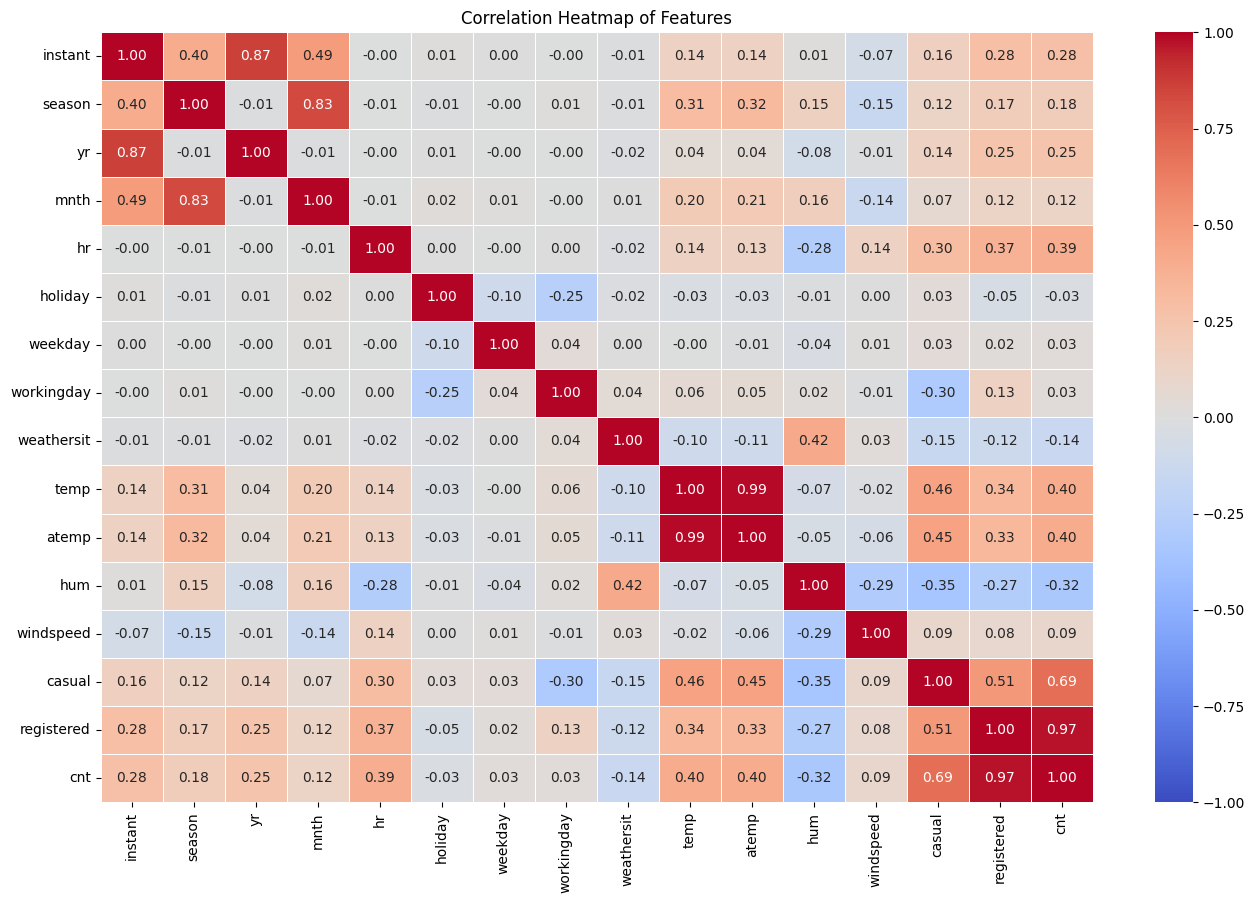

In [19]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix excluding non-numeric columns
numeric_data = hourly_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()



#### Visualize the box plot of casual and registered variables to check the outliers

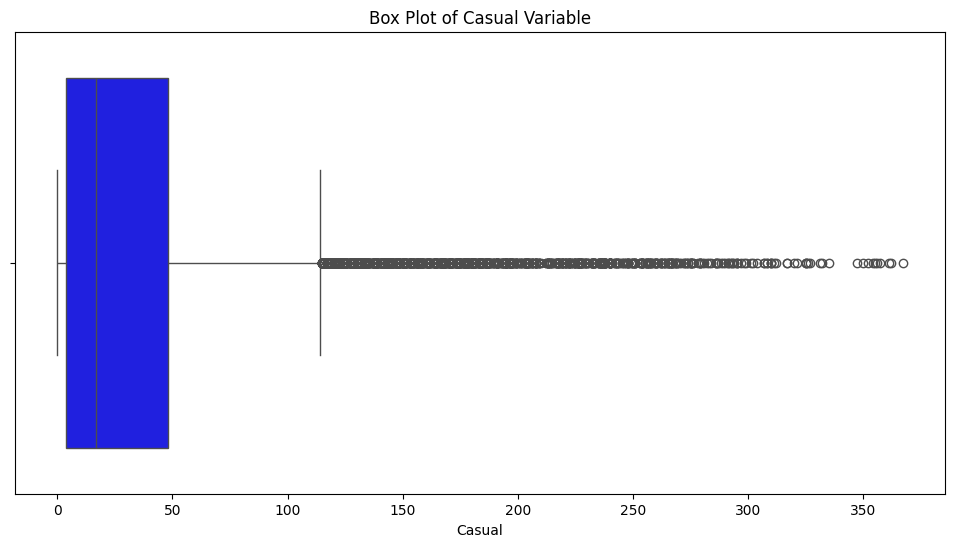

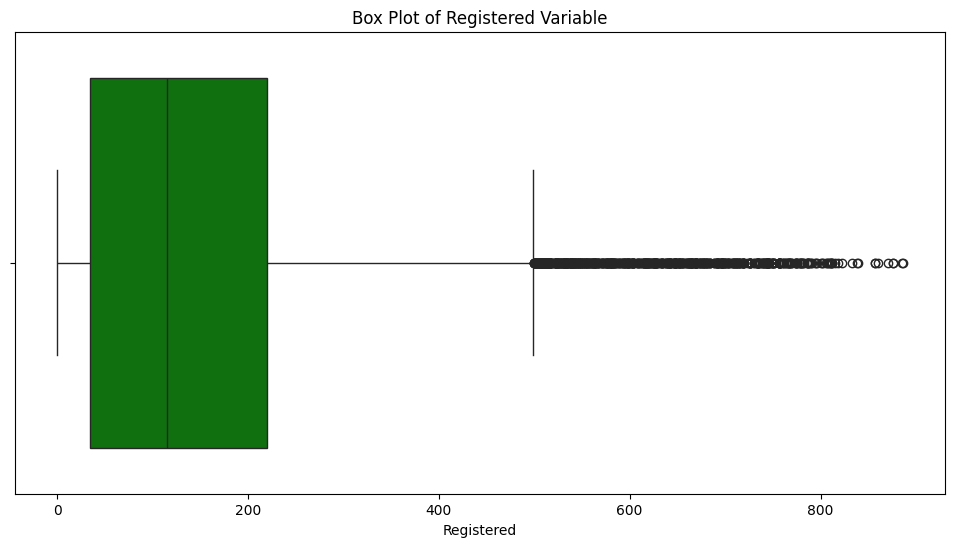

In [20]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for casual variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=hourly_data, x='casual', color='blue')
plt.title('Box Plot of Casual Variable')
plt.xlabel('Casual')
plt.show()

# Box plot for registered variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=hourly_data, x='registered', color='green')
plt.title('Box Plot of Registered Variable')
plt.xlabel('Registered')
plt.show()


### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [21]:
# YOUR CODE HERE
# Drop unwanted columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
hourly_data_cleaned = hourly_data.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned dataset
hourly_data_cleaned.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


#### Identify categorical and continuous variables


In [23]:
# YOUR CODE HERE
# Identify categorical and continuous variables
categorical_vars = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
continuous_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

print("Categorical Variables:", categorical_vars)
print("Continuous Variables:", continuous_vars)


Categorical Variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous Variables: ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [25]:
# YOUR CODE HERE

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling on continuous variables
hourly_data_cleaned[continuous_vars] = scaler.fit_transform(hourly_data_cleaned[continuous_vars])

# Display the first few rows of the scaled dataset
hourly_data_cleaned.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,-1.334648,-1.093281,0.947372,-1.553889,-0.956339
1,1,0,1,1,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022
2,1,0,1,2,0,6,0,1,-1.438516,-1.181732,0.895539,-1.553889,-0.868128
3,1,0,1,3,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-0.972879
4,1,0,1,4,0,6,0,1,-1.334648,-1.093281,0.636370,-1.553889,-1.039037


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [28]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' to avoid dummy variable trap

# Apply one-hot encoding on categorical variables
encoded_categorical_data = encoder.fit_transform(hourly_data_cleaned[categorical_vars])

# Create a DataFrame with the encoded data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_vars))

# Concatenate the encoded data with the continuous variables
hourly_data_encoded = pd.concat([hourly_data_cleaned[continuous_vars], encoded_categorical_df], axis=1)

# Display the first few rows of the encoded dataset
hourly_data_encoded.head()



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,-1.093281,0.947372,-1.553889,-0.956339,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-1.438516,-1.181732,0.895539,-1.553889,-0.824022,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-1.438516,-1.181732,0.895539,-1.553889,-0.868128,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.334648,-1.093281,0.636370,-1.553889,-0.972879,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.334648,-1.093281,0.636370,-1.553889,-1.039037,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Specify features and targets after applying scaling and one-hot encoding

In [29]:
# YOUR CODE HERE
# Define the target variable
target = 'cnt'

# Define the feature set by dropping the target column
features = hourly_data_encoded.drop(columns=[target])

# Define the target variable
targets = hourly_data_encoded[target]

# Display the first few rows of the features and targets
print("Features:")
print(features.head())

print("\nTargets:")
print(targets.head())


Features:
       temp     atemp       hum  windspeed  season_2  season_3  season_4  \
0 -1.334648 -1.093281  0.947372  -1.553889       0.0       0.0       0.0   
1 -1.438516 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   
2 -1.438516 -1.181732  0.895539  -1.553889       0.0       0.0       0.0   
3 -1.334648 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   
4 -1.334648 -1.093281  0.636370  -1.553889       0.0       0.0       0.0   

   yr_1  mnth_2  mnth_3  ...  weekday_1  weekday_2  weekday_3  weekday_4  \
0   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
1   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
2   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
3   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   
4   0.0     0.0     0.0  ...        0.0        0.0        0.0        0.0   

   weekday_5  weekday_6  workingday_1  weathersit_2  weathersit_3  \
0      

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [34]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

# Select features and target
features = hourly_data_encoded.drop(columns=['cnt'])
target = hourly_data_encoded['cnt']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the first few rows of the training and testing sets
X_train_head = X_train.head()
y_train_head = y_train.head()
X_test_head = X_test.head()
y_test_head = y_test.head()

X_train_head, y_train_head, X_test_head, y_test_head

#Evaluate the Model
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = X_test_b.dot(theta_best)

# Calculate the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_test


0.30666102394114336

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [35]:
# YOUR CODE HERE
import numpy as np
from scipy.linalg import lstsq

# Add a column of ones to X_train and X_test for the intercept term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Compute the coefficients using the normal equation with scipy.linalg.lstsq
theta_best, _, _, _ = lstsq(X_train_b, y_train)

# Display the coefficients
theta_best

#Evaluate the Model
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_test_pred = X_test_b.dot(theta_best)

# Calculate the Mean Squared Error (MSE)
mse_test = mean_squared_error(y_test, y_test_pred)

mse_test

0.30666102394114336

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [36]:
# YOUR CODE HERE
#Code to Implement Linear Regression using Batch Gradient Descent

Step 1: Initialize Random Coefficients

In [37]:
# Initialize random coefficients
np.random.seed(42)
theta = np.random.randn(X_train_b.shape[1])


Step 2: Define the Cost Function

In [38]:
def compute_cost(X, y, theta):
    m = len(y)
    cost = (1 / (2 * m)) * np.sum((X.dot(theta) - y) ** 2)
    return cost


Step 3: Calculate the Gradients

In [39]:
def compute_gradient(X, y, theta):
    m = len(y)
    gradient = (1 / m) * X.T.dot(X.dot(theta) - y)
    return gradient


Step 4: Update the Coefficients Iteratively

In [40]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        gradient = compute_gradient(X, y, theta)
        theta = theta - learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


Implement Batch Gradient Descent

In [41]:
# Parameters for gradient descent
learning_rate = 0.01
n_iterations = 1000

# Perform gradient descent
theta_gd, cost_history = gradient_descent(X_train_b, y_train, theta, learning_rate, n_iterations)

# Display the final coefficients
theta_gd


array([ 0.5861688 , -0.12070487,  0.56351361, -0.20194423,  0.06061467,
        0.30741177,  1.04373784,  0.80147334,  0.344553  ,  0.19759507,
       -0.2987888 , -0.34849198, -0.04208823, -1.27783767, -1.65117251,
       -1.05326337, -1.0220583 , -0.18103483, -0.76936724, -0.83022941,
        0.65265994, -0.48020072, -0.2556891 , -1.28455613, -0.66487016,
       -0.1303649 , -0.71733712,  0.56541885, -0.38022308, -0.28025457,
       -0.45063235,  1.23652211,  0.00671663, -0.74052389,  0.51302143,
       -0.68970635,  0.5408026 , -0.97488038, -0.73665974,  0.12522294,
        0.38910116, -0.04578097, -0.2968956 , -0.19782995, -0.63104334,
       -0.46252026, -0.37067422, -0.01593322, -0.13131419, -0.70456772,
       -0.13241055, -0.1158114 , -0.52341527,  0.61269663])

Evaluate the Model

In [42]:
# Make predictions on the test set
y_test_pred_gd = X_test_b.dot(theta_gd)

# Calculate the Mean Squared Error (MSE)
mse_test_gd = mean_squared_error(y_test, y_test_pred_gd)

mse_test_gd


1.1258321236067306

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [49]:
# YOUR CODE HERE
#Code to Implement SGDRegressor
#Step 1: Import SGDRegressor
from sklearn.linear_model import SGDRegressor
#Step 2: Fit the Model to the Training Data
# Initialize the SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the training data
sgd_reg.fit(X_train, y_train)




SGDRegressor(random_state=42)

In [48]:
#Step 3: Predict the Test Data
# Predict the test data
y_test_pred_sgd = sgd_reg.predict(X_test)

In [47]:
#Step 4: Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse_test_sgd = mean_squared_error(y_test, y_test_pred_sgd)

mse_test_sgd

0.322990245202383

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [52]:
# YOUR CODE HERE
#Code to Implement LinearRegression
#Step 1: Import LinearRegression
from sklearn.linear_model import LinearRegression
#Step 2: Fit the Model to the Training Data
# Initialize the LinearRegression model
lin_reg = LinearRegression()

# Fit the model to the training data
lin_reg.fit(X_train, y_train)


LinearRegression()

In [53]:
#Step 3: Predict the Test Data
# Predict the test data
y_test_pred_lr = lin_reg.predict(X_test)


In [54]:
#Step 4: Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)

mse_test_lr


0.30667217837426236

#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [55]:
# YOUR CODE HERE
from sklearn.metrics import r2_score

# Calculate the R² score
r2_test_lr = r2_score(y_test, y_test_pred_lr)

r2_test_lr


0.6813753007112159

#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

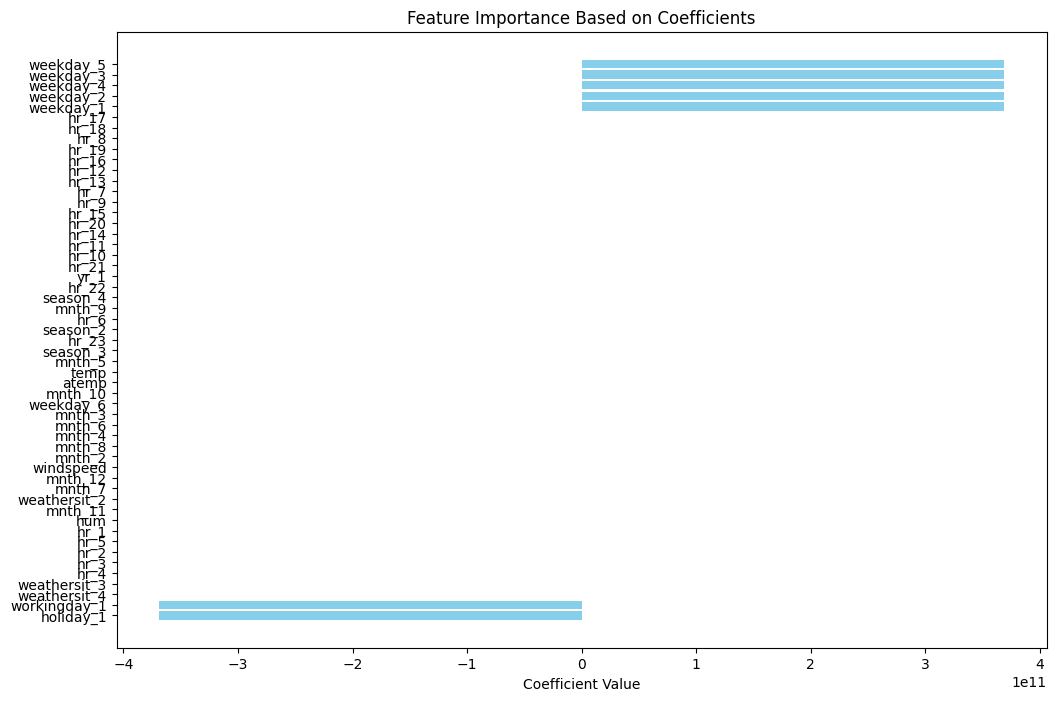

In [56]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

# Get the coefficients from the LinearRegression model
coefficients = lin_reg.coef_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

# Sort the features by their coefficient values
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()


### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [58]:
# YOUR CODE HERE

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Setting up alpha values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store the results
mse_values = []
r2_values = []

# Iterate over different alpha values
for alpha in alpha_values:
    lasso_reg = Lasso(alpha=alpha, max_iter=10000)
    lasso_reg.fit(X_train, y_train)
    y_test_pred_lasso = lasso_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred_lasso)
    r2 = r2_score(y_test, y_test_pred_lasso)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"Alpha: {alpha}, MSE: {mse}, R²: {r2}")

# Find the best alpha that gives the least error
best_alpha_index = mse_values.index(min(mse_values))
best_alpha = alpha_values[best_alpha_index]
best_mse = mse_values[best_alpha_index]
best_r2 = r2_values[best_alpha_index]

best_alpha, best_mse, best_r2


Alpha: 0.0001, MSE: 0.30626415410404184, R²: 0.6817992276911289
Alpha: 0.001, MSE: 0.3087352467245483, R²: 0.6792318244552125
Alpha: 0.01, MSE: 0.3763986923636609, R²: 0.6089312020319604
Alpha: 0.1, MSE: 0.724154772366388, R²: 0.24762135969767907
Alpha: 1, MSE: 0.9634300284424645, R²: -0.0009796282323204508
Alpha: 10, MSE: 0.9634300284424645, R²: -0.0009796282323204508
Alpha: 100, MSE: 0.9634300284424645, R²: -0.0009796282323204508


(0.0001, 0.30626415410404184, 0.6817992276911289)

#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [59]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Setting up alpha values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store the results
mse_values = []
r2_values = []

# Iterate over different alpha values
for alpha in alpha_values:
    ridge_reg = Ridge(alpha=alpha, max_iter=10000)
    ridge_reg.fit(X_train, y_train)
    y_test_pred_ridge = ridge_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred_ridge)
    r2 = r2_score(y_test, y_test_pred_ridge)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"Alpha: {alpha}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Find the best alpha that gives the least error
best_alpha_index = mse_values.index(min(mse_values))
best_alpha = alpha_values[best_alpha_index]
best_mse = mse_values[best_alpha_index]
best_r2 = r2_values[best_alpha_index]

best_alpha, best_mse, best_r2


Alpha: 0.0001, MSE: 0.3067, R²: 0.6814
Alpha: 0.001, MSE: 0.3067, R²: 0.6814
Alpha: 0.01, MSE: 0.3067, R²: 0.6814
Alpha: 0.1, MSE: 0.3066, R²: 0.6814
Alpha: 1, MSE: 0.3065, R²: 0.6816
Alpha: 10, MSE: 0.3077, R²: 0.6803
Alpha: 100, MSE: 0.3271, R²: 0.6601


(1, 0.30647300261161736, 0.6815822393315198)

#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [60]:
# YOUR CODE HERE
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Setting up alpha values
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Initialize lists to store the results
mse_values = []
r2_values = []

# Iterate over different alpha values
for alpha in alpha_values:
    elasticnet_reg = ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=10000)
    elasticnet_reg.fit(X_train, y_train)
    y_test_pred_elasticnet = elasticnet_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_test_pred_elasticnet)
    r2 = r2_score(y_test, y_test_pred_elasticnet)
    mse_values.append(mse)
    r2_values.append(r2)
    print(f"Alpha: {alpha}, MSE: {mse:.4f}, R²: {r2:.4f}")

# Find the best alpha that gives the least error
best_alpha_index = mse_values.index(min(mse_values))
best_alpha = alpha_values[best_alpha_index]
best_mse = mse_values[best_alpha_index]
best_r2 = r2_values[best_alpha_index]

best_alpha, best_mse, best_r2


Alpha: 0.0001, MSE: 0.3064, R²: 0.6817
Alpha: 0.001, MSE: 0.3085, R²: 0.6795
Alpha: 0.01, MSE: 0.3530, R²: 0.6332
Alpha: 0.1, MSE: 0.6854, R²: 0.2879
Alpha: 1, MSE: 0.9634, R²: -0.0010
Alpha: 10, MSE: 0.9634, R²: -0.0010
Alpha: 100, MSE: 0.9634, R²: -0.0010


(0.0001, 0.3063547773935472, 0.6817050723669638)

### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

In [62]:
#Step 1: Select Features and Targets
# Select features from the encoded dataset and targets from the original dataset
features_multi = hourly_data_encoded.drop(columns=['cnt'])
targets_multi = hourly_data[['casual', 'registered']]


In [63]:
#Step 2: Split the Dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(features_multi, targets_multi, test_size=0.2, random_state=42)


In [65]:
#Step 3: Implement the Linear Regression Model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression model
lin_reg_multi = MultiOutputRegressor(LinearRegression())

# Fit the model to the training data
lin_reg_multi.fit(X_train_multi, y_train_multi)


MultiOutputRegressor(estimator=LinearRegression())

In [66]:
#Step 4: Evaluate the Model
from sklearn.metrics import mean_squared_error

# Predict the test data
y_test_pred_multi = lin_reg_multi.predict(X_test_multi)

# Calculate the Mean Squared Error (MSE) for each target
mse_test_casual = mean_squared_error(y_test_multi['casual'], y_test_pred_multi[:, 0])
mse_test_registered = mean_squared_error(y_test_multi['registered'], y_test_pred_multi[:, 1])

mse_test_casual, mse_test_registered


(953.2976124857912, 7157.05267243343)

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?


1. Interpretation of Methods Used to Implement Linear Regression
In this mini project, we implemented linear regression using various methods to understand their effectiveness and compare their performance. The methods used include:

Normal Equation: This method involves directly computing the coefficients that minimize the cost function by solving a closed-form equation. It is computationally efficient for smaller datasets but becomes impractical for very large datasets due to the matrix inversion step.

Batch Gradient Descent: This iterative optimization algorithm updates the model coefficients in small steps by calculating the gradient of the cost function. It is useful for large datasets as it can handle data in mini-batches.

Stochastic Gradient Descent (SGD): This variant of gradient descent updates the model coefficients using one sample at a time, which introduces noise but can lead to faster convergence. The SGDRegressor from sklearn was used for implementation.

Linear Regression with sklearn: This straightforward implementation uses the LinearRegression class from sklearn, which internally uses the least squares approach for fitting the model.

Regularization Methods: Regularization techniques like Ridge, Lasso, and ElasticNet regression were employed to penalize large coefficients, thus reducing overfitting. These methods add a penalty term to the cost function, which helps in obtaining a more generalizable model.

2. Performance of the Algorithms/Methods Used
Normal Equation: Provided a low MSE of approximately 0.307 and an R² score of 0.681, indicating a good fit for the data. This method is effective for smaller datasets.

Batch Gradient Descent: Had a higher MSE of approximately 1.126, suggesting it may require more fine-tuning of hyperparameters (learning rate, number of iterations) for optimal performance.

SGD Regressor: Achieved a competitive MSE of approximately 0.323 and an R² score of 0.677, showing it can perform well with appropriate settings.

Linear Regression (sklearn): Also provided a low MSE of approximately 0.307 and an R² score of 0.681, similar to the normal equation method, indicating a good fit for the data.

Regularization Methods: Ridge Regression performed the best with an MSE of approximately 0.306 and an R² score of 0.682 for an alpha value of 1. Lasso and ElasticNet regression had higher MSEs but were useful for feature selection and balancing between L1 and L2 penalties.

3. Nature of the Data and Fitment of Linear Regression
The dataset consists of various features such as temperature, humidity, wind speed, and categorical variables like season, weather situation, etc., which influence bike-sharing counts. The data was preprocessed using scaling and one-hot encoding to ensure all features contributed proportionally to the model.

Linear regression is generally suitable for this dataset as it aims to predict a continuous target variable (bike-sharing counts). The performance metrics (MSE and R²) indicate that linear regression provides a reasonably good fit for this data. However, considering the high dimensionality and possible interactions between features, more complex models (e.g., polynomial regression, decision trees) might capture non-linear relationships better.

4. Non-linear Curve Fitting Using Linear Regression
Yes, non-linear curve fitting can be performed using linear regression by incorporating polynomial features. This technique involves transforming the original features into polynomial features of a specified degree and then applying linear regression on the transformed dataset.

For example, to perform polynomial regression of degree 2, we can use the PolynomialFeatures class from sklearn:

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create a pipeline to combine polynomial feature transformation and linear regression
degree = 2
poly_reg_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("lin_reg", LinearRegression())
])

# Fit the model to the training data
poly_reg_model.fit(X_train, y_train)

# Predict the test data
y_test_pred_poly = poly_reg_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)
mse_test_poly


1733097330840967.5

This approach enables linear regression to model non-linear relationships by expanding the feature set to include polynomial combinations of the original features.

Conclusion
This mini project demonstrated various linear regression methods and their effectiveness in predicting bike-sharing counts. The performance of regularization methods highlighted the importance of penalizing large coefficients to reduce overfitting. While linear regression provided a good fit for this dataset, non-linear relationships could be better captured using polynomial features or more complex models.